# Código MonteCarlo Diego Montero

### El objetivo de este código es generar aleatoriamemte estrellas que podrían perfectamente representar las estrellas de la Via lactea. Estadísticamente primero generamos masas de estrellas de modo que se ajusten al IMF de Kroupa, utilizando este como una densidad de probabilidad de encontrar una estrella con una cierta masa. Con estas masas generadas, luego dotamos a cada una de ellas con un tiempo considerando que SFR es constante. Luego una vez obtenida la tupla (masa,tiempo) procedemos a clasificar cada estella generar según si esta pertence aún a la Secuencia Principal. Una vez separadas las estrellas mendiante el paso anterior procedemos a verificar, si es que está fuera de la secuencia principal, si esta evoluciona a un agujero negro, estrella de neutrones o enana blanca. Finalmente para cada una de estas útimas clasificaciones le determinamos las masas finales de las estrellas. 

Para comenzar importamos las librerias necesarias las cuales son numpy, matplotlib y random. Además establecemos los parámetros principales a utilizar, tales como los intérvalos para el IMF de Kroupa, el número de intervalos de separacion para la generación de estrellas, numero de intervalos para la separación del tiempo y el número de estrellas. Los números de intervalos se crearon de forma que fueran concordantes con el número de estrellas escogidas. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Limiteinf=10**(-2)
inter1=0.08
inter2=0.5
Limitesup=100
NumIntervalosEs=[3000,3000,3000,30000,300000]
NumIntervalosT=[200,200,200,200,200]
NumeroEstrellas=[100,1000,10000,100000,1000000]


Luego generamos un set de masas en los intervalos correspondientes del IMF de Kroupa (m1,m2 y m3) de modo de poder graficar el IMF. Los IMF de Kroupa son proporcionales a las masas a las potencias -0.3, -1.3 y -2.3 lo cual nos deja con incógnitas las constantes de proporcionalidad. Estas constantes xi_0,xi_1 y xi_2 las obtenemos mediante la condicion de continuidad de las funciones y además la condición de normalidad (la integral de todo el rango de masas del IMF sea 1). Por ello el siguiente paso realizado es el calculo de las integrales y la obtención de la función del IMF normalizada y continua.

In [2]:
m1 = np.linspace(Limiteinf, inter1, 100)  
m2 = np.linspace(inter1, inter2, 100)
m3 = np.linspace(inter2, Limitesup, 100)

IntegralR1=((inter1)**(0.7))/0.7-((Limiteinf)**(0.7))/0.7
IntegralR2=((inter2)**(-0.3))/(-0.3)-((inter1)**(-0.3))/(-0.3)
IntegralR3=((Limitesup)**(-1.3))/(-1.3)-((inter2)**(-1.3))/(-1.3)

xi_0=1/(IntegralR1+inter1*IntegralR2+inter1*inter2*IntegralR3)
xi_1=inter1*xi_0
xi_2=inter2*xi_1

IMF1 = xi_0*m1**(-0.3)
IMF2 = xi_1*m2**(-1.3)
IMF3 = xi_2*m3**(-2.3)


Una vez obtenido el IMF, se procede a la creación de una lista de masas que sigan el IMF. Para ello generamos una lista vacía donde colocaremos todos los posibles valores de masa a ecoger. Estas últimas estarán determinadas por el número de intervalos en los que subdividimos las masas de las estrellas (NumIntervalosES). Una vez creada esta lista, a cada masa le agregamos su respectivo peso dado por la evaluación de la masa en el IMF, creando así una nueva lista que poderará la probabilidad de elección de cada masa. Finalmente mediante la función choices() de la librería random seleccionamos cada uno de los elementos de la lista "NumeroEstrellas", con sus asignados pesos. 

In [3]:
def Pesos(Lista):
    
    Pesos=[]
    
    for m in Lista:
        if 0.01<=m<=0.08:
            Pesos.append(xi_0*m**(-0.3))
        elif 0.08<=m<=0.5:
            Pesos.append(xi_1*m**(-1.3))
        elif 0.5<=m<=Limitesup:
            Pesos.append(xi_2*m**(-2.3))
    return Pesos

Mases=[]

for k in range(0,len(NumIntervalosEs)):
 Masai=[]
 for m in range(0,NumIntervalosEs[k]+1):
    Masai.append(0.01+m*(Limitesup-0.01)/(NumIntervalosEs[k]))
 Mases.append(Masai)

MASAS=[]

for i in range(0,len(NumeroEstrellas)):
 masa=random.choices(Mases[i],Pesos(Mases[i]),k=NumeroEstrellas[i])
 MASAS.append(masa)

De modo de probar que realmente los dato generados aleatoriamente realmente siguen la distribución del IMF, hicimos un histograma normalizado para cada una de las cantidades de estrellas en la simulación. Podrá ver que a medida que se aumenta el número de datos, más se ajusta a la curva del IMF.

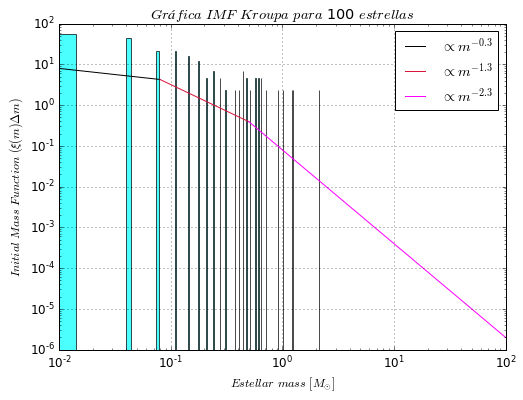

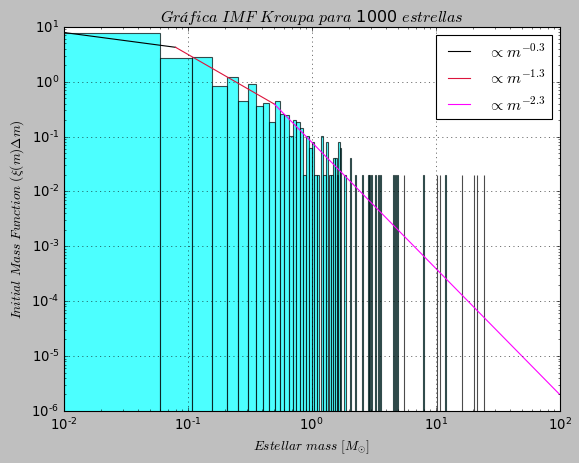

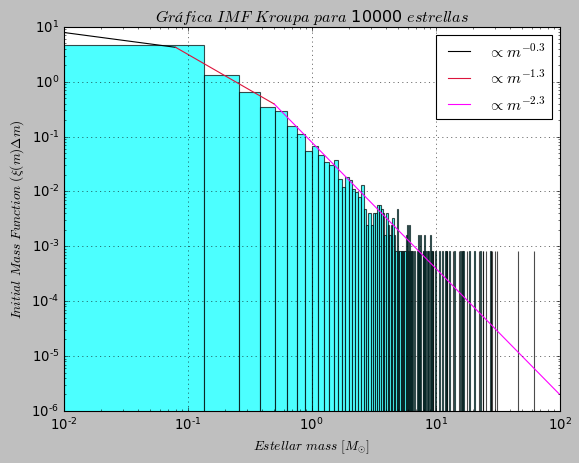

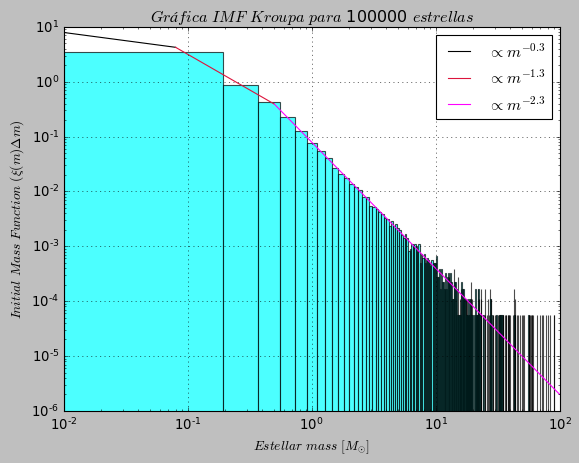

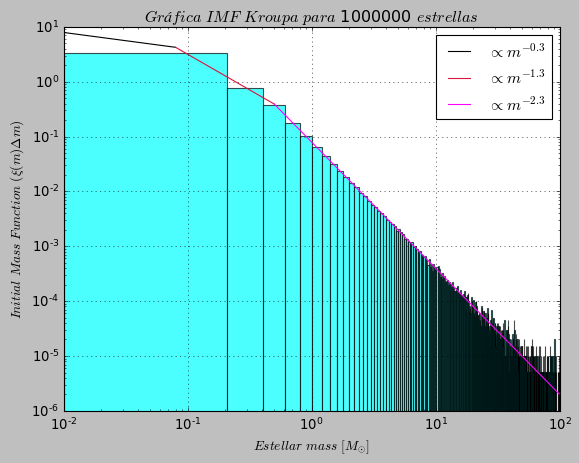

In [4]:
count=0
for masa in MASAS:
 plt.figure(figsize=(8, 6))
 plt.style.use('classic')
 plt.hist(masa, bins=500, density=True, alpha=0.7, color='cyan', edgecolor='k')
 plt.plot(m1, IMF1, label=r'$\propto m^{-0.3}$', color='k')
 plt.plot(m2, IMF2, label=r'$\propto m^{-1.3}$', color='crimson')
 plt.plot(m3, IMF3, label=r'$\propto m^{-2.3}$', color='magenta')
 plt.title(r'$Gráfica$ $IMF$ $Kroupa$ $para$ '+str(NumeroEstrellas[count])+' $estrellas$')
 plt.xlabel(r'$Estellar$ $mass$ $[M_{\odot}]$')
 plt.ylabel(r'$Initial$ $Mass$ $Function$ $(\xi(m)\Delta m)$')
 plt.xscale('log')
 plt.yscale('log')
 plt.grid(True)
 plt.legend()
 plt.show()
 count=count+1


Ahora necesitamos asignarle un tiempo de vida a cada una de las estrellas creadas. Para ello como suponemos el SFR constante, es claro que no es necesario generar elementos con una distribución de probabilidad, sino que basta generarlos aleatoriamente con los mismos pesos (default). Se espera que como el SFR es constante luego el area bajo la curva del SFR vs Tiempo sea el Numero de estrellas, por tanto el SFR debería ser (considerando el tiempo desde 0 hasta 10Gyr) de SFR=N/10^{10}yr con N el número de estrellas. A continuación hicimos un procedimiento creando la lista de tiempos y escogiendo los tiempos para cada masa. 

In [5]:
MASTIEMP=[]
for i in range(0,len(NumIntervalosT)):
 Tiempo=[]
 for t in range(0,NumIntervalosT[i]):
    Tiempo.append(0+t*(10)/(NumIntervalosT[i]-1))
    TIEMPOS=random.choices(Tiempo,k=NumeroEstrellas[i])
 MasTiemp=[]
 for k in range(0,len(MASAS[i])):
    MasTiemp.append([MASAS[i][k],TIEMPOS[k]])
 print(len(MasTiemp))
 MASTIEMP.append(MasTiemp)

100
1000
10000
100000
1000000


Luego con esta lista de listas de (Masas,Tiempos), realizamos un plot de histograma de intervalos de 10^{10} yr. De esta forma necesariamente debería ajustar al SFR.

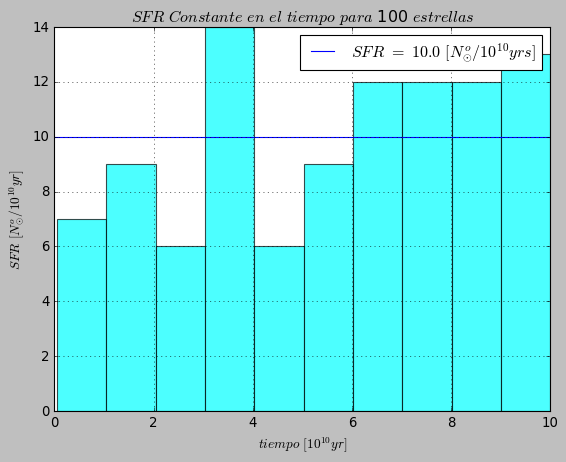

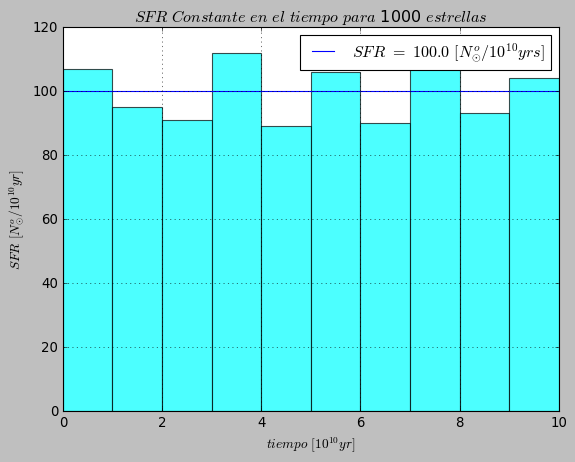

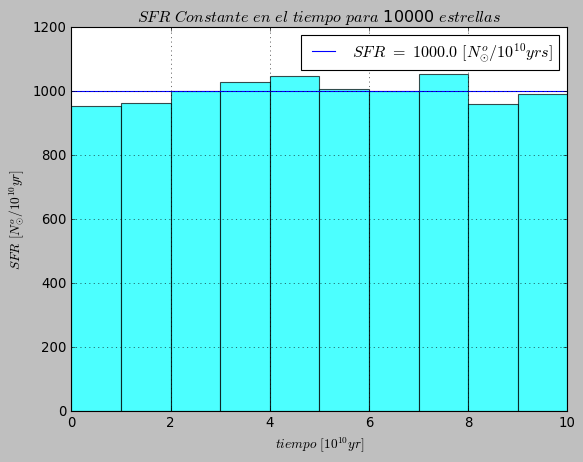

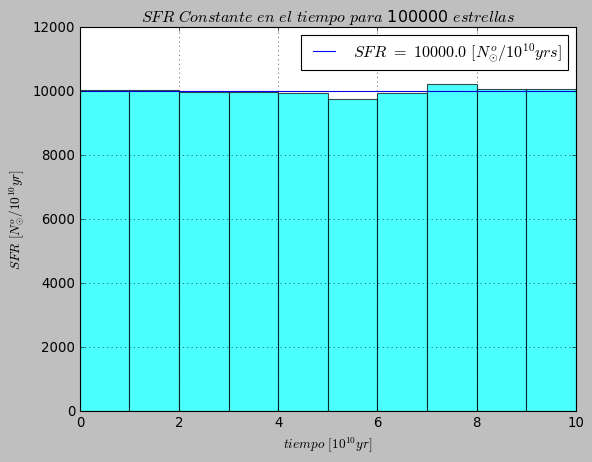

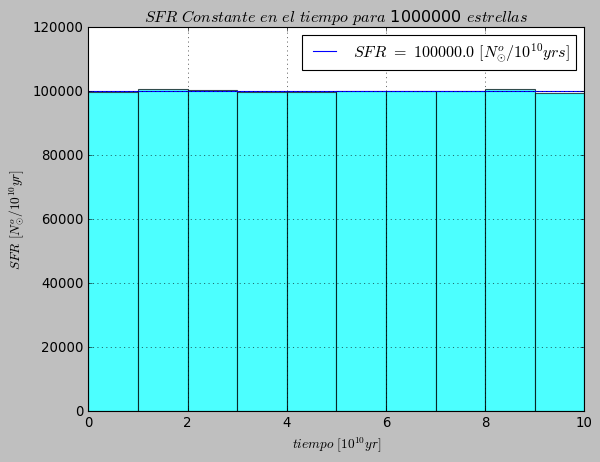

In [6]:
T=np.linspace(0,10,100)
for k in range(0,len(MASTIEMP)):
    Tiempo=[]
    for h in MASTIEMP[k]:
        Tiempo.append(h[1])
    SFR=[]
    for t in T:
     SFR.append(NumeroEstrellas[k]/10)
    plt.style.use('classic')
    plt.title(r'$SFR$ $Constante$ $en$ $el$ $tiempo$ $para$ '+str(NumeroEstrellas[k])+' $estrellas$')
    plt.xlabel(r'$tiempo$ $[10^{10}yr]$')
    plt.ylabel(r'$SFR$ $[N^{o}_{\odot}/10^{10}yr]$')
    plt.hist(Tiempo, bins=10, alpha=0.7, color='cyan', edgecolor='k')
    plt.plot(T,SFR,label=r'$SFR$ $=$ $'+str(NumeroEstrellas[k]/10)+'$ $[N^{o}_{\odot}/10^{10}yrs]$')
    plt.grid(True)
    plt.legend()
    plt.show()

A continuación separamos las estrellas que poseen tiempos fuera de la Main Sequence (TMSsup y MASAsup). Además guardamos los datos de las estrellas que se encuentran dentro de la Main Sequence (TMSinf y MASAinf). Realizamos este procedimiento para cada cantidad de estrellas seleccionadas.

In [7]:
MASAREMANENTES=[]
TIEMPOREMANENTES=[]
MASAMS=[]
TIEMPOMS=[]
for i in range(0,len(MASTIEMP)):
 TMSsup=[]
 TMSinf=[]
 for mT in MASTIEMP[i]:
    if mT[1]<=mT[0]**(-2.5):
      TMSinf.append(mT)
    elif mT[0]**(-2.5)<mT[1]:
      TMSsup.append(mT)
 
 MASAsup=[]
 MASAinf=[]
 Tiemposup=[]
 Tiempoinf=[]

 for mT in TMSsup:
    MASAsup.append(mT[0])
    Tiemposup.append(mT[1])
    
 for mT in TMSinf:
    MASAinf.append(mT[0])
    Tiempoinf.append(mT[1])
 
 MASAREMANENTES.append(MASAsup)
 TIEMPOREMANENTES.append(Tiemposup)
 MASAMS.append(MASAinf)
 TIEMPOMS.append(Tiempoinf)


La gráfica separando por colores la estrellas dentro y fuera de la secuencia principal para cada número de estrellas ecogida se muestra a continuación.

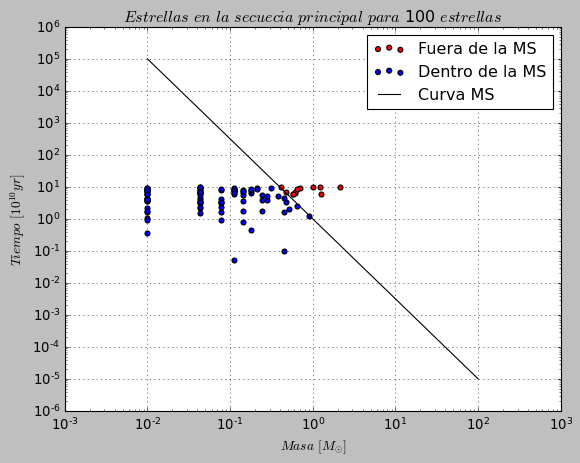

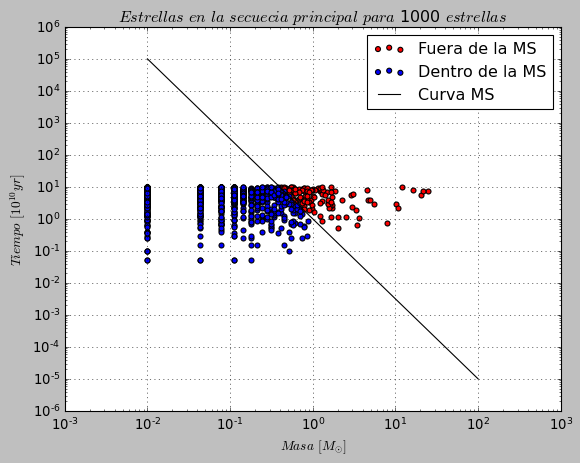

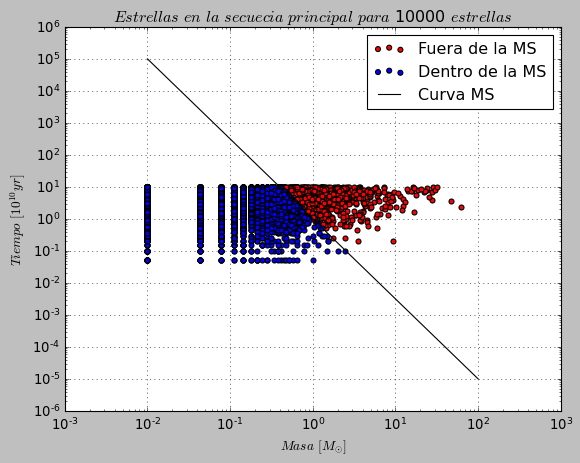

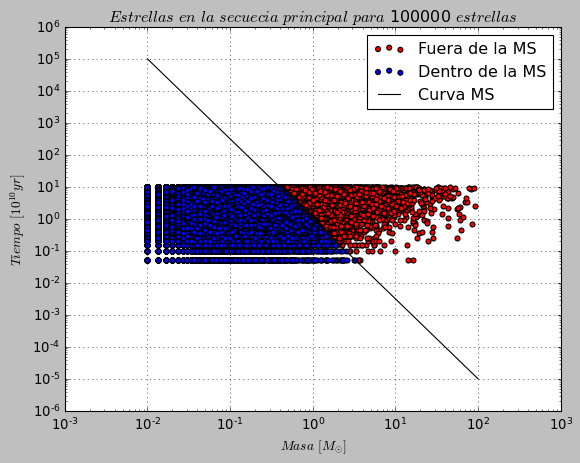

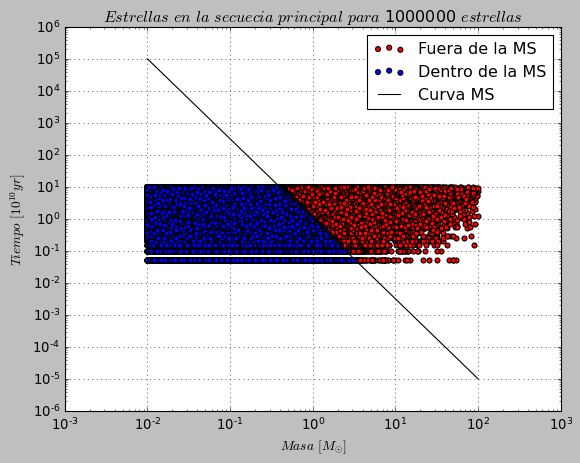

In [8]:
Mass=np.linspace(0.01,100,1000)
TMS=Mass**(-2.5)
for i in range(0,len(NumeroEstrellas)):
 plt.style.use('classic')
 plt.title(r'$Estrellas$ $en$ $la$ $secuecia$ $principal$ $para$ '+str(NumeroEstrellas[i])+' $estrellas$')
 plt.xlabel(r'$Masa$ $[M_{\odot}]$')
 plt.ylabel(r'$Tiempo$ $[10^{10}yr]$')
 plt.scatter(MASAREMANENTES[i],TIEMPOREMANENTES[i],c='red',label='Fuera de la MS')
 plt.scatter(MASAMS[i],TIEMPOMS[i],c='blue',label='Dentro de la MS')
 plt.xscale('log')
 plt.yscale('log')
 plt.plot(Mass,TMS,c='k',label='Curva MS')
 plt.legend()
 plt.grid(True)
 plt.show()

Ahora separamos en White Dwarfs, Black holes y neutron Stars registrando las masas y tiempos 

In [9]:
WDm=[]
BHm=[]
NSm=[]
WDt=[]
BHt=[]
NSt=[]
for k in range(0,len(MASAREMANENTES)):
    wdm=[]
    bhm=[]
    nsm=[]
    wdt=[]
    bht=[]
    nst=[]
    for i in range(0,len(MASAREMANENTES[k])):
        if MASAREMANENTES[k][i]<=8:
            wdm.append(MASAREMANENTES[k][i])
            wdt.append(TIEMPOREMANENTES[k][i])
        elif 8<MASAREMANENTES[k][i]<=20:
            nsm.append(MASAREMANENTES[k][i])
            nst.append(TIEMPOREMANENTES[k][i])
        elif MASAREMANENTES[k][i]>20:
            bhm.append(MASAREMANENTES[k][i])
            bht.append(TIEMPOREMANENTES[k][i])
    WDm.append(wdm)
    BHm.append(bhm)
    NSm.append(nsm)
    WDt.append(wdt)
    BHt.append(bht)
    NSt.append(nst)

Ahora definimos las funciones las cuales permiten obtener las masas finales de los remanentes. 

In [10]:

def FinalWD(MWD):   
    FWD=[]
    if len(MWD)!=0:
     for m in MWD:
        FWD.append(0.109*m+0.394)
    return FWD

def FinalNS(MNS):
   FNS=[]
   if len(MNS)!=0:
    for m in MNS:
        if 9<=m<13:
            FNS.append(2.24+0.508*(m-14.75)+0.125*(m-14.75)**2+0.0110*(m-14.75)**3)
        elif 13<=m<15:
            FNS.append(0.123+0.112*m)
        elif 15<=m<17.8:
            FNS.append(0.996+0.0384*m)
        elif 17.8<=m<18.5:
            FNS.append(-0.02+0.1*m)
   return FNS

def FinalBH(MBH):
    FBH=[]
    if len(MBH)!=0:
     for m in MBH:
        if 15<=m<40:
         mcore=-2.049+0.4140*m
         mall=15.52-0.3294*(m-25.97)-0.02121*(m-25.97)**2+0.003120*(m-25.97)**3
         fej=0.9
         FBH.append(fej*mcore+(1-fej)*mall)
        elif 45<=m<120:
            FBH.append(5.697+7.8598*(10**8)*m**(-4.858))
    return (FBH)

Para finalmente obtener los histogramas de la cantidad de objetos para las masas finales de cada objeto mediante los IFMR. 

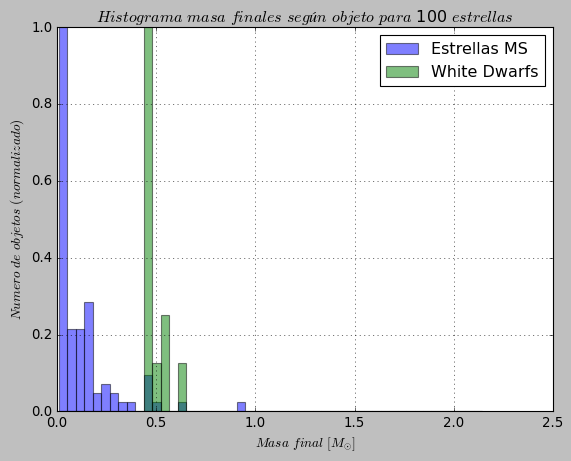

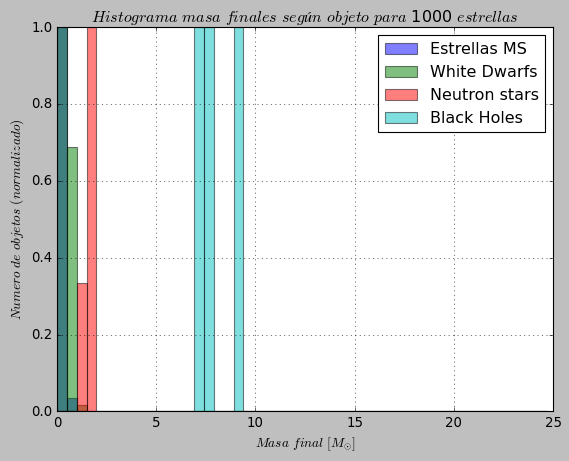

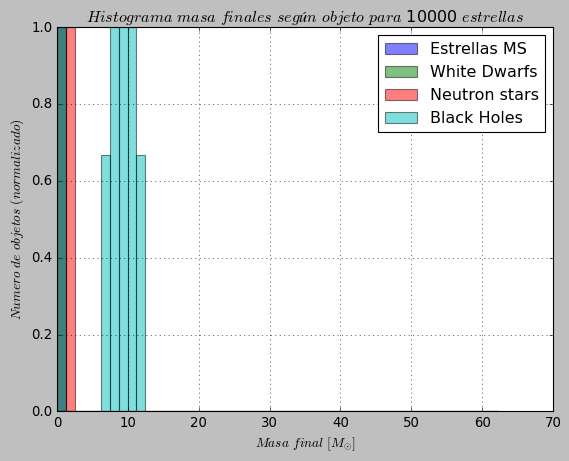

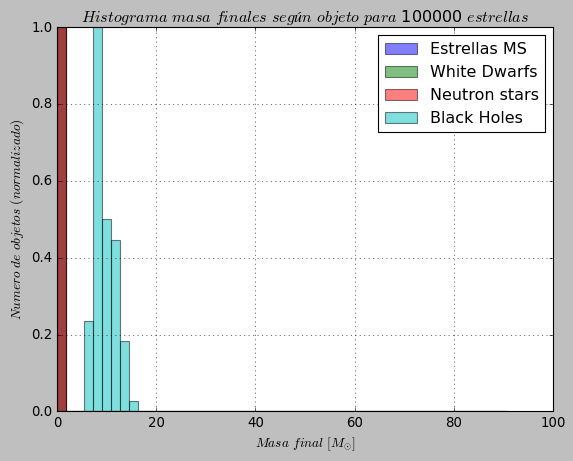

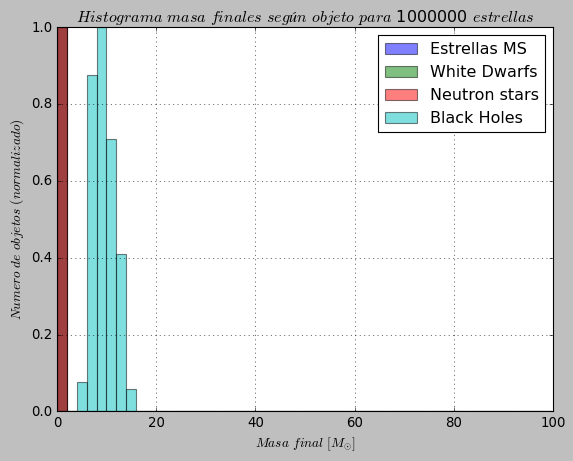

In [16]:
num_bin=50

for k in range(0,len(MASAREMANENTES)):
    m1=0
    m2=0
    m3=0
    m4=0
    if len(MASAMS[k])!=0:
     m1=max(MASAMS[k])    
    if len(WDm[k])!=0:
     m2=max(WDm[k]) 
    if len(NSm[k])!=0:
     m3=max(NSm[k])    
    if len(BHm[k])!=0:
     m4=max(BHm[k]) 
    
    bin_lims = np.linspace(0.01,max(m1,m2,m3,m4),num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    bin_widths = bin_lims[1:]-bin_lims[:-1]
    
    plt.style.use('classic')
    plt.title(r'$Histograma$ $masa$ $finales$ $según$ $objeto$ $para$ '+str(NumeroEstrellas[k])+' $estrellas$')
    plt.xlabel(r'$Masa$ $final$ $[M_{\odot}]$')
    plt.ylabel(r'$Numero$ $de$ $objetos$ $(normalizado)$')
    
    if len(MASAMS[k])!=0:
     hist1, _ = np.histogram(MASAMS[k], bins=bin_lims)
     hist1N = hist1/np.max(hist1)
     plt.bar(bin_centers, hist1N, width = bin_widths, align = 'center', alpha = 0.5,label='Estrellas MS')
    if len(FinalWD(WDm[k]))!=0:
     hist2, _ = np.histogram(FinalWD(WDm[k]), bins=bin_lims)
     hist2N = hist2/np.max(hist2)
     plt.bar(bin_centers, hist2N, width = bin_widths, align = 'center', alpha = 0.5,label='White Dwarfs')
    if len(FinalNS(NSm[k]))!=0:
     hist3, _ = np.histogram(FinalNS(NSm[k]), bins=bin_lims)
     hist3N = hist3/np.max(hist3)
     plt.bar(bin_centers, hist3N, width = bin_widths, align = 'center', alpha = 0.5,label='Neutron stars')
    if len(FinalBH(BHm[k]))!=0:
     hist4, _ = np.histogram(FinalBH(BHm[k]), bins=bin_lims)
     hist4N = hist4/np.max(hist4)   
     plt.bar(bin_centers, hist4N, width = bin_widths, align = 'center', alpha = 0.5,label='Black Holes')
    plt.grid(True)
    plt.legend()
    plt.show()

Por otro lado, el número de objetos que yacen en los intervalos temporales se pueden obtener mediante un histograma de forma similar

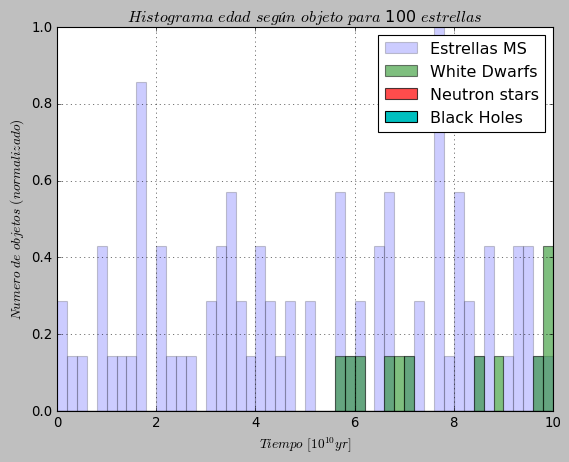

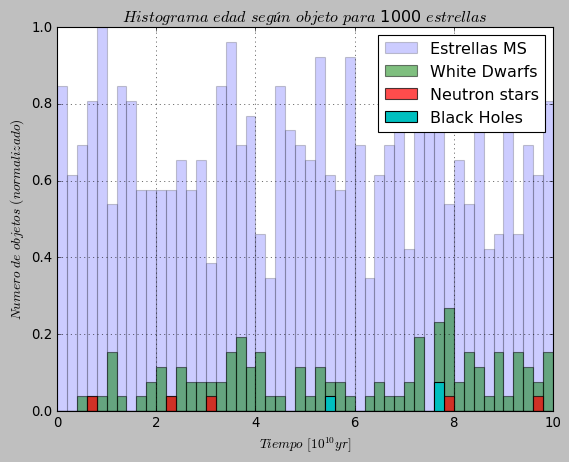

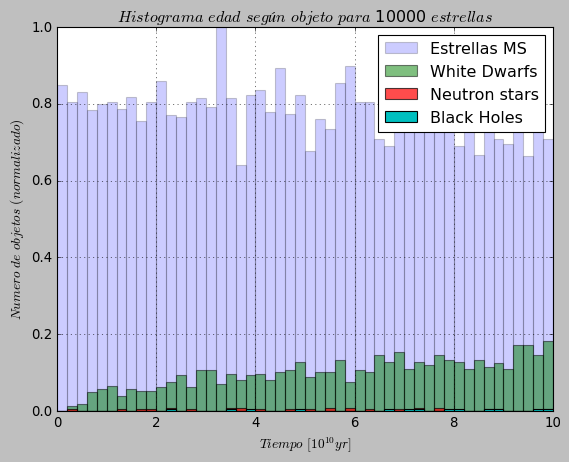

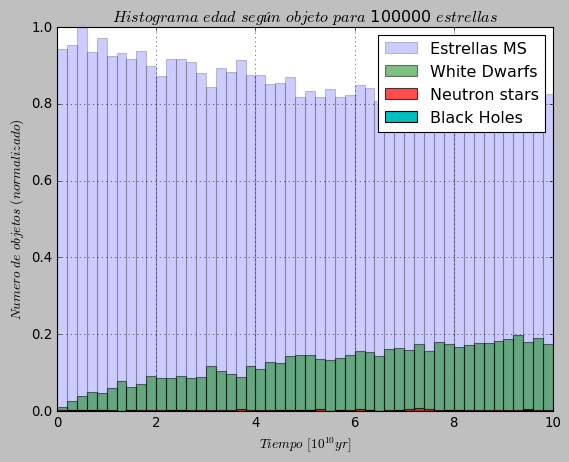

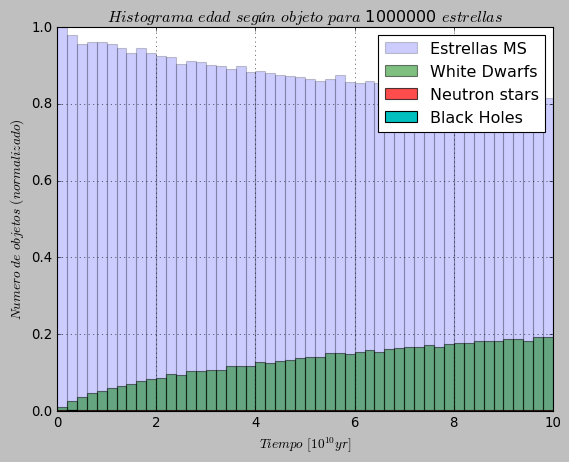

In [13]:
num_bin=50
bin_lims = np.linspace(0,10,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

for k in range(0,len(TIEMPOREMANENTES)):
    
    hist1, _ = np.histogram(TIEMPOMS[k], bins=bin_lims)
    hist2, _ = np.histogram(WDt[k], bins=bin_lims)
    hist3, _ = np.histogram(NSt[k], bins=bin_lims)
    hist4, _ = np.histogram(BHt[k], bins=bin_lims)
    
    hist1N = hist1/np.max(hist1)
    hist2N = hist2/np.max(hist1)
    hist3N = hist3/np.max(hist1)
    hist4N = hist4/np.max(hist1)
    
    plt.style.use('classic')
    plt.title(r'$Histograma$ $edad$ $según$ $objeto$ $para$ '+str(NumeroEstrellas[k])+' $estrellas$')
    plt.xlabel(r'$Tiempo$ $[10^{10}yr]$')
    plt.ylabel(r'$Numero$ $de$ $objetos$ $(normalizado)$')
    
    plt.bar(bin_centers, hist1N, width = bin_widths, align = 'center', alpha = 0.2,label='Estrellas MS')
    plt.bar(bin_centers, hist2N, width = bin_widths, align = 'center', alpha = 0.5,label='White Dwarfs')
    plt.bar(bin_centers, hist3N, width = bin_widths, align = 'center', alpha = 0.7,label='Neutron stars')
    plt.bar(bin_centers, hist4N, width = bin_widths, align = 'center', alpha = 1,label='Black Holes')
    plt.grid(True)
    plt.legend()
    plt.show()

Finalizamos obteniendo la cantidad de White Dwarfs, Neutron Stars y Black Holes con respecto al número de estrellas en la secuencia principal

In [14]:
for k in range(0,len(NumeroEstrellas)):
 print('Razón de White Dwarfs con respecto a las estrellas MS para '+
       str(NumeroEstrellas[k])+' estrellas generadas: ',round(len(WDm[k])/len(MASAMS[k]),5))
 print('Razón de Neutron Stars con respecto a las estrellas MS para '+
       str(NumeroEstrellas[k])+' estrellas generadas: ',round(len(NSm[k])/len(MASAMS[k]),5))
 print('Razón de Black Holes con respecto a las estrellas MS para '+
       str(NumeroEstrellas[k])+' estrellas generadas: ',round(len(BHm[k])/len(MASAMS[k]),5))

Razón de White Dwarfs con respecto a las estrellas MS para 100 estrellas generadas:  0.13636
Razón de Neutron Stars con respecto a las estrellas MS para 100 estrellas generadas:  0.0
Razón de Black Holes con respecto a las estrellas MS para 100 estrellas generadas:  0.0
Razón de White Dwarfs con respecto a las estrellas MS para 1000 estrellas generadas:  0.12344
Razón de Neutron Stars con respecto a las estrellas MS para 1000 estrellas generadas:  0.00566
Razón de Black Holes con respecto a las estrellas MS para 1000 estrellas generadas:  0.0034
Razón de White Dwarfs con respecto a las estrellas MS para 10000 estrellas generadas:  0.12606
Razón de Neutron Stars con respecto a las estrellas MS para 10000 estrellas generadas:  0.00305
Razón de Black Holes con respecto a las estrellas MS para 10000 estrellas generadas:  0.00147
Razón de White Dwarfs con respecto a las estrellas MS para 100000 estrellas generadas:  0.14527
Razón de Neutron Stars con respecto a las estrellas MS para 100000 

Donde si hay 100 billones de estrellas en MS (tal como en la Via láctea), luego 

In [17]:
 
for k in range(0,len(NumeroEstrellas)):
 print('Cantidad de White Dwarfs para '+
       str(NumeroEstrellas[k])+' estrellas generadas: ',round(100*len(WDm[k])/len(MASAMS[k]),5),'billones')
 print('Cantidad de Neutron Stars para '+
       str(NumeroEstrellas[k])+' estrellas generadas: ',round(100*len(NSm[k])/len(MASAMS[k]),5),'billones')
 print('Cantidad de Black Holes para '+
       str(NumeroEstrellas[k])+' estrellas generadas: ',round(100*len(BHm[k])/len(MASAMS[k]),5),'billones')

Cantidad de White Dwarfs para 100 estrellas generadas:  13.63636 billones
Cantidad de Neutron Stars para 100 estrellas generadas:  0.0 billones
Cantidad de Black Holes para 100 estrellas generadas:  0.0 billones
Cantidad de White Dwarfs para 1000 estrellas generadas:  12.34428 billones
Cantidad de Neutron Stars para 1000 estrellas generadas:  0.56625 billones
Cantidad de Black Holes para 1000 estrellas generadas:  0.33975 billones
Cantidad de White Dwarfs para 10000 estrellas generadas:  12.60599 billones
Cantidad de Neutron Stars para 10000 estrellas generadas:  0.30526 billones
Cantidad de Black Holes para 10000 estrellas generadas:  0.14698 billones
Cantidad de White Dwarfs para 100000 estrellas generadas:  14.52748 billones
Cantidad de Neutron Stars para 100000 estrellas generadas:  0.32651 billones
Cantidad de Black Holes para 100000 estrellas generadas:  0.11497 billones
Cantidad de White Dwarfs para 1000000 estrellas generadas:  14.67589 billones
Cantidad de Neutron Stars para 1